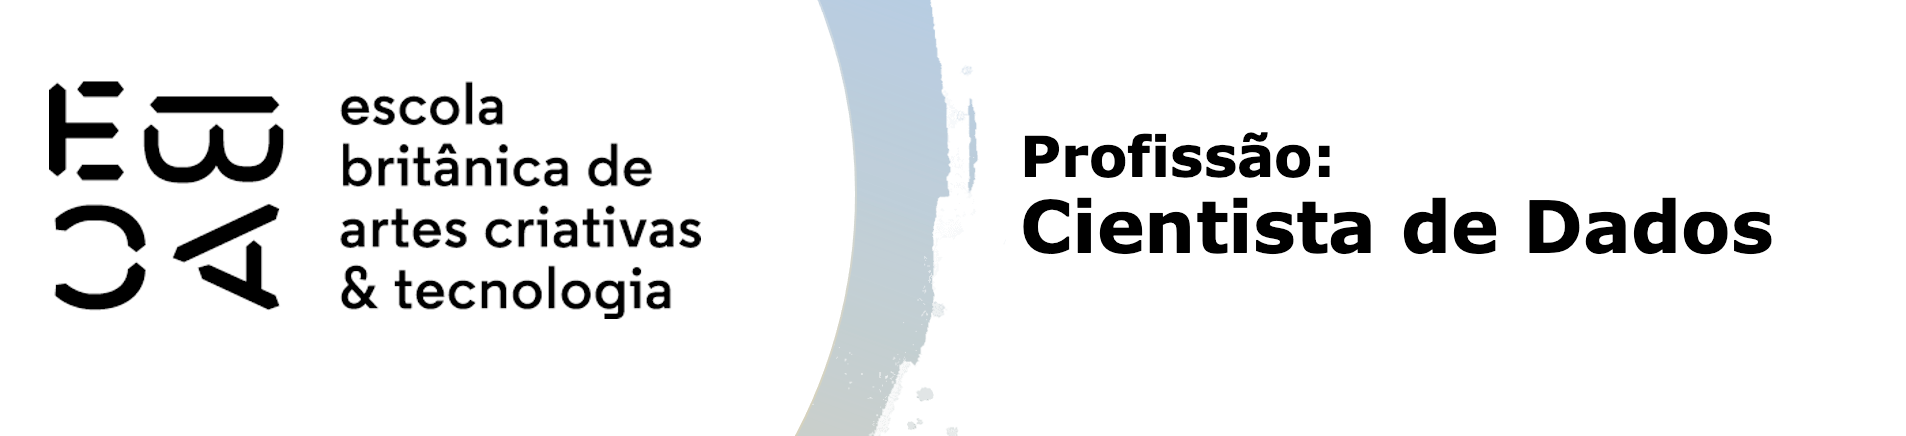

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [92]:
import numpy as np
import pandas as pd
import matplotlib as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

import scipy.stats as ss 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [94]:
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].mean())
df.isna().sum()

index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750000 entries, 2015-01-01 to 2016-03-01
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  750000 non-null  int64  
 1   sexo                   750000 non-null  object 
 2   posse_de_veiculo       750000 non-null  object 
 3   posse_de_imovel        750000 non-null  object 
 4   qtd_filhos             750000 non-null  int64  
 5   tipo_renda             750000 non-null  object 
 6   educacao               750000 non-null  object 
 7   estado_civil           750000 non-null  object 
 8   tipo_residencia        750000 non-null  object 
 9   idade                  750000 non-null  int64  
 10  tempo_emprego          750000 non-null  float64
 11  qt_pessoas_residencia  750000 non-null  float64
 12  renda                  750000 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 80.1+ MB


In [98]:
df_dumm = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True).astype('int')
df_dumm

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
data_ref,,,,,,,,,,,,,,,,,,,,,
2015-01-01,5762,0,47,16,2,11138,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2015-01-01,1279,0,30,9,2,2424,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2015-01-01,14111,0,28,8,2,13749,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2015-01-01,8189,2,44,1,4,2361,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2015-01-01,1830,2,33,1,4,790,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-01,11611,1,29,8,3,2930,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2016-03-01,9144,0,65,7,2,4084,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2016-03-01,16583,0,33,10,2,4339,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [100]:
df['log_renda'] = np.log(df.renda)

In [102]:
df.index = pd.to_datetime(df.index)

metade = len(df) // 2

df = df.iloc[:metade]

data_final = df.index.max()
data_inicio_teste = data_final - pd.DateOffset(months=3)

df_train = df[df.index < data_inicio_teste]
df_test = df[df.index >= data_inicio_teste]

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

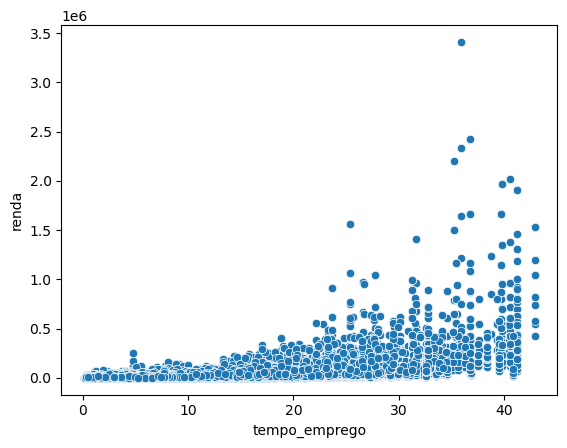

In [105]:
sns.scatterplot(y='renda', x='tempo_emprego', data=df_train);

In [106]:
reg = smf.ols('''log_renda ~ sexo +
                posse_de_veiculo + 
                posse_de_imovel +
                qtd_filhos +
                tipo_renda +
                educacao +
                estado_civil +
                tipo_residencia +
                idade +
                tempo_emprego +
                qt_pessoas_residencia''', data=df_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     8335.
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:32:40   Log-Likelihood:            -2.4251e+05
No. Observations:              200000   AIC:                         4.851e+05
Df Residuals:                  199975   BIC:                         4.853e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.1551      0.075     94.805      0.000       7.007       7.303
sexo[T.M]                            0.1422      0.004     33.086      0.000       0.134       0.151
posse_de_veiculo[T.S]               -0.0040      0.004     -0.989      0.323      -0.012       0.004
posse_de_imovel[T.S]                 0.1862      0.004     46.612      0.000       0.178       0.194
tipo_renda[T.Bolsista]              -0.2877      0.086     -3.330      0.001      -0.457      -0.118
tipo_renda[T.Empresário]             0.1405      0.005     30.427      0.000       0.131       0.150
tipo_renda[T.Pensionista]           -0.3141      0.007    -47.602      0.000      -0.327      -0.301
tipo_renda[T.Servidor público]       0.1280      0.007     18.891      0.000       0.115       0.141
educacao[T.Médio]                    0.0285      0.017      1.653      0.098      -0.005       0.062
educacao[T.Pós graduação]            0.1543      0.061      2.551      0.011       0.036       0.273
educacao[T.Superior completo]        0.1900      0.017     10.865      0.000       0.156       0.224
educacao[T.Superior incompleto]      0.0599      0.019      3.076      0.002       0.022       0.098
estado_civil[T.Separado]             0.1614      0.036      4.421      0.000       0.090       0.233
estado_civil[T.Solteiro]             0.1459      0.036      4.071      0.000       0.076       0.216
estado_civil[T.União]                0.0152      0.007      2.184      0.029       0.002       0.029
estado_civil[T.Viúvo]                0.1758      0.037      4.768      0.000       0.104       0.248
tipo_residencia[T.Casa]             -0.0981      0.016     -6.181      0.000      -0.129      -0.067
tipo_residencia[T.Com os pais]      -0.0591      0.018     -3.298      0.001      -0.094      -0.024
tipo_residencia[T.Comunitário]      -0.1353      0.031     -4.309      0.000      -0.197      -0.074
tipo_residencia[T.Estúdio]          -0.1688      0.026     -6.376      0.000      -0.221      -0.117
tipo_residencia[T.Governamental]    -0.0907      0.019     -4.809      0.000      -0.128      -0.054
qtd_filhos                          -0.1294      0.036     -3.624      0.000      -0.199      -0.059
idade                                0.0050      0.000     21.044      0.000       0.005       0.006
tempo_emprego                        0.1286      0.000    403.467      0.000       0.128       0.129
qt_pessoas_residencia                0.1392      0.036      3.906      0.000       0.069       0.209
==============================================================================
Omnibus:                        5.737   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.656
Skew:             

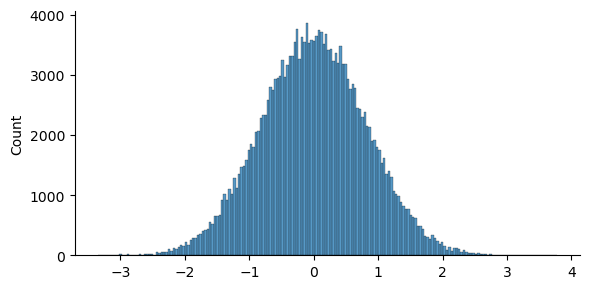

In [108]:
sns.displot(reg.resid, height=3, aspect=2)

<Axes: ylabel='None'>

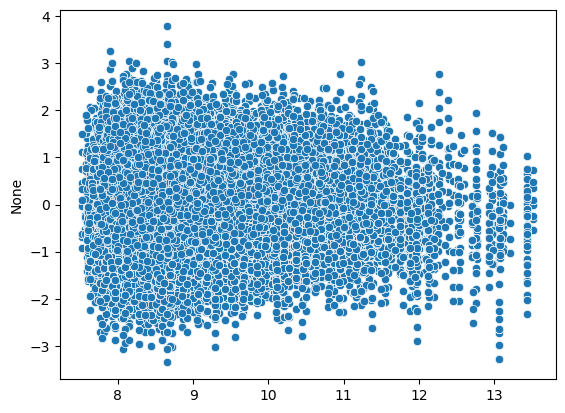

In [109]:
sns.scatterplot(x=reg.predict(), y=reg.resid)

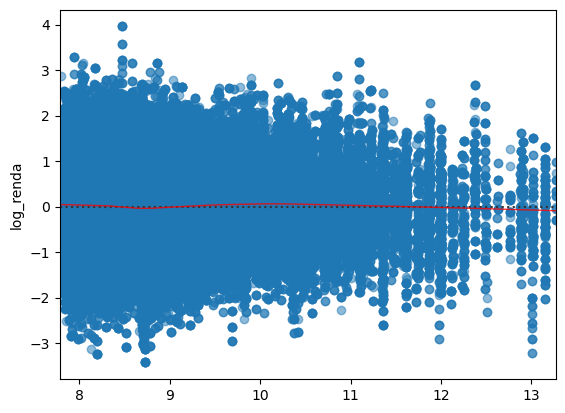

In [86]:
sns.residplot(x=reg.predict(), y='log_renda', data=df_train, lowess=True, 
                     scatter_kws={'alpha': 0.5}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

In [ ]:
st_res = reg.outlier_test()
sns.scatterplot(x = reg.predict(), y = st_res.student_resid);

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [115]:
df_dumm.corr(method='spearman')

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
index,1.000000,0.028806,-0.046462,-0.031230,0.031365,-0.018924,0.027181,-0.010768,-0.106680,-0.036067,...,-0.015616,-0.019421,0.014778,-0.008355,-0.033827,-0.020959,0.021815,0.008397,0.014303,0.008770
qtd_filhos,0.028806,1.000000,-0.415151,-0.084182,0.828600,-0.019957,0.118979,0.120125,-0.014756,-0.014811,...,0.035905,-0.011660,-0.129928,0.011926,-0.110355,-0.044221,0.043468,-0.006703,0.036230,0.003364
idade,-0.046462,-0.415151,1.000000,0.286280,-0.350006,0.107999,-0.215249,-0.166339,0.130489,0.016079,...,-0.154209,0.057186,-0.069353,-0.057369,0.214403,0.155365,-0.190445,-0.017949,-0.006899,0.011105
tempo_emprego,-0.031230,-0.084182,0.286280,1.000000,-0.053291,0.503366,-0.126297,-0.067272,0.012562,0.023471,...,-0.055784,0.000315,-0.045282,-0.022680,0.046830,0.066433,-0.085682,-0.038532,0.025036,0.008386
qt_pessoas_residencia,0.031365,0.828600,-0.350006,-0.053291,1.000000,-0.008260,0.158574,0.173039,-0.018073,-0.004032,...,0.020628,-0.263756,-0.486828,0.094172,-0.305468,-0.021624,0.026630,-0.003731,0.030513,-0.002589
renda,-0.018924,-0.019957,0.107999,0.503366,-0.008260,1.000000,-0.005485,-0.002209,0.062270,0.005812,...,-0.027892,0.010882,-0.017494,-0.012135,-0.005246,0.033060,-0.040262,-0.016726,0.008652,-0.001235
sexo_M,0.027181,0.118979,-0.215249,-0.126297,0.158574,-0.005485,1.000000,0.367430,-0.055353,-0.015648,...,0.019476,-0.062220,-0.034315,-0.024862,-0.138822,-0.062660,0.053816,0.020366,0.053661,-0.021501
posse_de_veiculo_S,-0.010768,0.120125,-0.166339,-0.067272,0.173039,-0.002209,0.367430,1.000000,-0.025415,-0.017923,...,0.018819,-0.076818,-0.081675,-0.035032,-0.092673,-0.021778,0.021771,0.028529,0.031273,-0.018888
posse_de_imovel_S,-0.106680,-0.014756,0.130489,0.012562,-0.018073,0.062270,-0.055353,-0.025415,1.000000,0.015692,...,-0.045805,-0.017151,0.004828,-0.033026,0.039389,0.202921,-0.157139,-0.020386,-0.038695,-0.121679
tipo_renda_Bolsista,-0.036067,-0.014811,0.016079,0.023471,-0.004032,0.005812,-0.015648,-0.017923,0.015692,1.000000,...,-0.004543,-0.005497,-0.008372,-0.006489,-0.004697,0.007528,-0.004834,-0.001486,-0.001917,-0.004033


In [ ]:
df_dumm = df_dumm.drop(columns=['renda'])

In [128]:
vars_vif = pd.DataFrame()
vars_vif['VIF Factor'] = [vif(df_dumm, i) for i in range(df_dumm.shape[1])]
vars_vif['Features'] = df_dumm.columns

vars_vif.round(2)

,VIF Factor,Features
0,-0.00,index
1,34.95,qtd_filhos
2,34.59,idade
3,2.77,tempo_emprego
4,244.82,qt_pessoas_residencia
5,1.82,sexo_M
6,1.97,posse_de_veiculo_S
7,3.27,posse_de_imovel_S
8,1.01,tipo_renda_Bolsista
9,1.48,tipo_renda_Empresário


## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [142]:
r1 = smf.ols('''log_renda ~ sexo +
                posse_de_imovel +
                qtd_filhos +
                idade +
                tempo_emprego''', data=df_train).fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                 3.756e+04
Date:                Tue, 19 Nov 2024   Prob (F-statistic):               0.00
Time:                        10:55:04   Log-Likelihood:            -2.4563e+05
No. Observations:              200000   AIC:                         4.913e+05
Df Residuals:                  199994   BIC:                         4.913e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.7857      0.009    855.276      0.000       7.768       7.804
sexo[T.M]                0.1404      0.004     34.659      0.000       0.132       0.148
posse_de_imovel[T.S]     0.1834      0.004     46.131      0.000       0.176       0.191
qtd_filhos               0.0061      0.003      2.246      0.025       0.001       0.011
idade                   -0.0042      0.000    -22.493      0.000      -0.005      -0.004
tempo_emprego            0.1323      0.000    423.934      0.000       0.132       0.133
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.915
Skew:                           0.004   Prob(JB):                        0.633
Kurtosis:                       2.994   Cond. No.                         231.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""